# Trial & Error Code Clustering using PSO

### (Fix code in the last section)

Optimization completed.
Optimal centroids found by PSO:
 [[9.25367341 4.11503754]
 [9.02765574 6.64495597]
 [2.18488099 1.61145232]
 [4.26874532 7.25500433]
 [7.6524059  1.56532578]
 [3.70316854 9.02376228]
 [7.25402173 7.9210042 ]
 [5.25987593 3.42652602]
 [0.6860968  9.79162735]
 [0.41566823 4.99230744]]
Best SSE score: 395.6836536031357
Silhouette Score: 0.34224706687068474
Davies-Bouldin Score: 0.8650423943389123


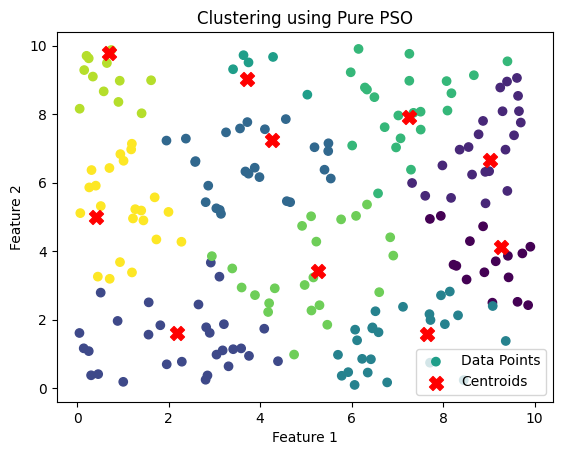

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Parameters for PSO
class PSOParameters:
    particles = 30       # Number of particles
    iterations = 100     # Number of iterations
    w = 0.7             # Inertia weight
    c1 = 1.5            # Cognitive coefficient (pbest)
    c2 = 2            # Social coefficient (gbest)
    K = 10               # Number of clusters

class PSOClustering:
    def __init__(self, data, params):
        """
        Initialize PSO clustering instance.
        
        Args:
        data (np.array): Array of data points to cluster.
        params (PSOParameters): PSO parameters for clustering.
        """
        self.data = data
        self.params = params
        self.num_features = data.shape[1]
        
        # Initialize particles' positions and velocities
        self.positions = np.random.rand(params.particles, params.K, self.num_features) * 10
        self.velocities = np.random.rand(params.particles, params.K, self.num_features) * 0.1
        self.pbest_positions = np.copy(self.positions)
        self.pbest_scores = np.full(params.particles, np.inf)
        
        # Initialize global best
        self.gbest_position = None
        self.gbest_score = np.inf

    def _calculate_fitness(self, centroids):
        """
        Calculate fitness as sum of squared distances (SSE) from points to closest centroids.
        """
        sse = 0
        for point in self.data:
            closest_centroid = np.argmin(np.linalg.norm(centroids - point, axis=1))
            sse += np.sum((point - centroids[closest_centroid]) ** 2)
        return sse

    def run(self):
        """
        Run PSO algorithm for clustering and update the global best centroids.
        """
        for iteration in range(self.params.iterations):
            for i in range(self.params.particles):
                # Compute fitness for each particle
                fitness_value = self._calculate_fitness(self.positions[i])
                
                # Update personal best if current fitness is better
                if fitness_value < self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness_value
                    self.pbest_positions[i] = self.positions[i]

                # Update global best if current fitness is the best found so far
                if fitness_value < self.gbest_score:
                    self.gbest_score = fitness_value
                    self.gbest_position = self.positions[i]
            
            # Update velocity and position of each particle
            for i in range(self.params.particles):
                r1, r2 = np.random.rand(), np.random.rand()
                self.velocities[i] = (self.params.w * self.velocities[i] +
                                      self.params.c1 * r1 * (self.pbest_positions[i] - self.positions[i]) +
                                      self.params.c2 * r2 * (self.gbest_position - self.positions[i]))
                self.positions[i] += self.velocities[i]

        print("Optimization completed.")
        return self.gbest_position, self.gbest_score

    def evaluate_clustering(self, centroids):
        """
        Evaluate clustering quality with Silhouette Score and Davies-Bouldin Score.
        """
        # Assign each point to the nearest centroid
        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        silhouette_avg = silhouette_score(self.data, clusters)
        davies_bouldin = davies_bouldin_score(self.data, clusters)
        
        print("Silhouette Score:", silhouette_avg)
        print("Davies-Bouldin Score:", davies_bouldin)
        return silhouette_avg, davies_bouldin

    def plot_clusters(self, centroids):
        """
        Plot the data points and resulting centroids from PSO clustering.
        """
        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        plt.scatter(self.data[:, 0], self.data[:, 1], c=clusters, cmap='viridis', label="Data Points")
        plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100, label="Centroids")
        plt.title("Clustering using Pure PSO")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()


# Usage example
if __name__ == "__main__":
    # Generate synthetic data or load your dataset
    np.random.seed(42)
    data = np.random.rand(200, 2) * 10  # Example: 200 points in 2D space

    # Initialize PSO parameters and clustering instance
    pso_params = PSOParameters()
    pso_clustering = PSOClustering(data, pso_params)

    # Run PSO and get optimal centroids
    centroids, score = pso_clustering.run()
    print("Optimal centroids found by PSO:\n", centroids)
    print("Best SSE score:", score)

    # Evaluate and visualize clustering results
    pso_clustering.evaluate_clustering(centroids)
    pso_clustering.plot_clusters(centroids)


Optimization completed.
Optimal centroids found by PSO:
 [[ 11.35207832   0.37513418]
 [  1.60532875 -11.1146969 ]
 [ -3.82762621  -9.79776943]]
Best Davies-Bouldin Score: 0.5955299604705075
Silhouette Score: 0.17622504968009736
Davies-Bouldin Score: 0.5955299604705075

Classification Metrics:
MAE: 0.8750
Accuracy: 0.4200
Precision: 0.1400
Recall: 0.3333
F1 Score: 0.1972


c:\Users\JuhenFW\VSCODE\myenv2\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


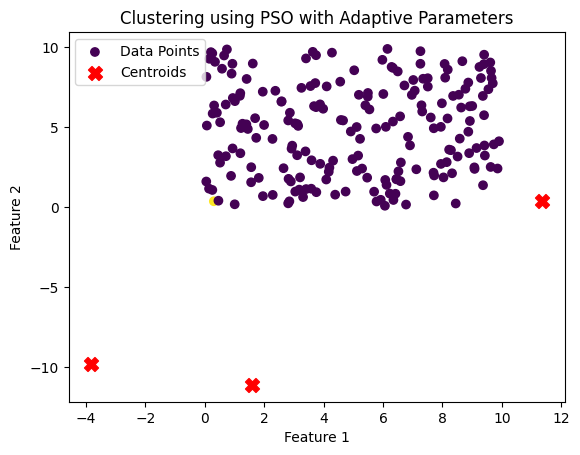

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode
from sklearn.cluster import KMeans

class PSOParameters:
    def __init__(self, particles=50, iterations=300, w=0.7, c1=1.5, c2=2.0, K=3):
        self.particles = particles
        self.iterations = iterations
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.K = K

class PSOClustering:
    def __init__(self, data, params):
        self.data = data
        self.params = params
        self.num_features = data.shape[1]
        
        # Inisialisasi posisi partikel dengan KMeans++
        kmeans = KMeans(n_clusters=params.K, init='k-means++', n_init=10)
        kmeans.fit(data)
        self.positions = np.array([kmeans.cluster_centers_ + np.random.rand(params.K, self.num_features) * 0.1 for _ in range(params.particles)])
        self.velocities = np.random.rand(params.particles, params.K, self.num_features) * 0.1
        self.pbest_positions = np.copy(self.positions)
        self.pbest_scores = np.full(params.particles, np.inf)
        
        self.gbest_position = None
        self.gbest_score = np.inf

    def _calculate_fitness(self, centroids):

        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        unique_clusters = len(np.unique(clusters))
        
        # Periksa apakah lebih dari satu cluster
        if unique_clusters > 1:
            # Jika ada lebih dari satu cluster, hitung Davies-Bouldin Score
            db_score = davies_bouldin_score(self.data, clusters)
        else:
            # Jika hanya satu cluster, berikan nilai fitness yang tinggi untuk menandakan clustering buruk
            db_score = np.inf
        
        return db_score


    def run(self):
        for iteration in range(self.params.iterations):
            # Perbarui inertia weight adaptif: menurun dari 0.9 ke 0.4
            self.params.w = 0.9 - (0.5 * (iteration / self.params.iterations))
            
            for i in range(self.params.particles):
                fitness_value = self._calculate_fitness(self.positions[i])
                
                if fitness_value < self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness_value
                    self.pbest_positions[i] = self.positions[i]

                if fitness_value < self.gbest_score:
                    self.gbest_score = fitness_value
                    self.gbest_position = self.positions[i]
            
            for i in range(self.params.particles):
                r1, r2 = np.random.rand(), np.random.rand()
                self.velocities[i] = (self.params.w * self.velocities[i] +
                                      self.params.c1 * r1 * (self.pbest_positions[i] - self.positions[i]) +
                                      self.params.c2 * r2 * (self.gbest_position - self.positions[i]))
                self.positions[i] += self.velocities[i]

        print("Optimization completed.")
        return self.gbest_position, self.gbest_score

    def evaluate_clustering(self, centroids):
        """
        Evaluasi clustering dengan Silhouette Score dan Davies-Bouldin Score.
        Menambahkan pengecekan apakah ada lebih dari satu cluster.
        """
        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        
        # Periksa jumlah cluster yang unik
        unique_clusters = len(np.unique(clusters))
        
        if unique_clusters > 1:
            # Jika ada lebih dari satu cluster, hitung metrik
            silhouette_avg = silhouette_score(self.data, clusters)
            davies_bouldin = davies_bouldin_score(self.data, clusters)
        else:
            # Jika hanya satu cluster, beri pesan peringatan dan atur skor default
            print("Warning: Only one cluster detected. Silhouette Score is not valid.")
            silhouette_avg = -1  # atau bisa menggunakan nilai lain sebagai penanda
            davies_bouldin = np.inf  # Davies-Bouldin Score yang tinggi menunjukkan clustering buruk
        
        print("Silhouette Score:", silhouette_avg)
        print("Davies-Bouldin Score:", davies_bouldin)
        return {"Silhouette Score": silhouette_avg, "Davies-Bouldin Score": davies_bouldin}

    def evaluate_classification_metrics(self, centroids, true_labels):
        predicted_clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        mapped_labels = np.zeros_like(predicted_clusters)
        for cluster in np.unique(predicted_clusters):
            mask = predicted_clusters == cluster
            cluster_labels = true_labels[mask]
            if len(cluster_labels) > 0:
                cluster_mode = mode(cluster_labels, keepdims=True).mode[0]
                mapped_labels[mask] = cluster_mode

        metrics = {
            "MAE": mean_absolute_error(true_labels, mapped_labels),
            "Accuracy": accuracy_score(true_labels, mapped_labels),
            "Precision": precision_score(true_labels, mapped_labels, average='macro'),
            "Recall": recall_score(true_labels, mapped_labels, average='macro'),
            "F1 Score": f1_score(true_labels, mapped_labels, average='macro')
        }
        
        print("\nClassification Metrics:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
        
        return metrics

    def plot_clusters(self, centroids):
        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        plt.scatter(self.data[:, 0], self.data[:, 1], c=clusters, cmap='viridis', label="Data Points")
        plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100, label="Centroids")
        plt.title("Clustering using PSO with Adaptive Parameters")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()

# Penggunaan kode untuk menjalankan clustering
if __name__ == "__main__":
    np.random.seed(42)
    data = np.random.rand(200, 2) * 10
    true_labels = np.random.randint(0, 3, size=200)

    pso_params = PSOParameters(K=3)
    pso_clustering = PSOClustering(data, pso_params)

    centroids, score = pso_clustering.run()
    print("Optimal centroids found by PSO:\n", centroids)
    print("Best Davies-Bouldin Score:", score)

    clustering_metrics = pso_clustering.evaluate_clustering(centroids)
    classification_metrics = pso_clustering.evaluate_classification_metrics(centroids, true_labels)
    pso_clustering.plot_clusters(centroids)


Optimization completed.
Optimal centroids found by PSO:
 [[4.01941735 4.15025893]
 [4.81289543 7.82763303]
 [7.80244653 5.84362947]
 [8.71829872 3.00314146]
 [0.6642852  9.05413634]
 [6.37883404 1.30626829]
 [3.32597973 1.25266042]
 [0.81033838 1.93243976]
 [8.57918179 8.28305204]
 [1.40906697 5.95570084]]
Best SSE score: 303.17955448445974
Silhouette Score: 0.38085694663174396
Davies-Bouldin Score: 0.7670891389899813

Classification Metrics:
MAE: 0.8050
Accuracy: 0.4600
Precision: 0.5246
Recall: 0.3967
F1 Score: 0.3562


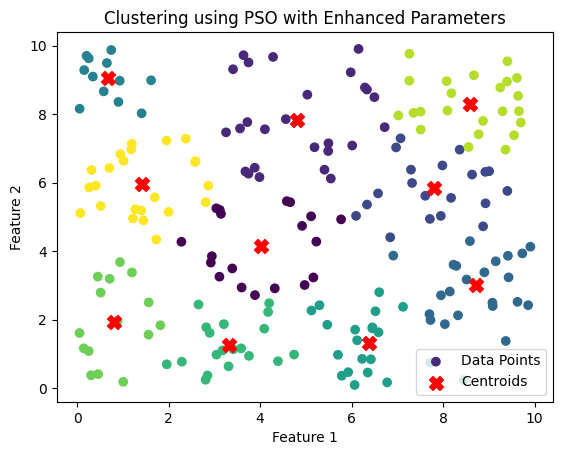

In [4]:
# %%
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode
from sklearn.cluster import KMeans

# Parameters for PSO with modified settings
class PSOParameters:
    def __init__(self, particles=50, iterations=200, w=0.7, c1=1.5, c2=2.0, K=10):
        self.particles = particles       # Number of particles
        self.iterations = iterations     # Number of iterations
        self.w = w                       # Inertia weight
        self.c1 = c1                     # Cognitive coefficient
        self.c2 = c2                     # Social coefficient
        self.K = K                       # Number of clusters

class PSOClustering:
    def __init__(self, data, params):
        self.data = data
        self.params = params
        self.num_features = data.shape[1]
        
        # Improved initialization using k-means++ for initial centroid positions
        kmeans = KMeans(n_clusters=params.K, init='k-means++', n_init=10)
        kmeans.fit(data)
        self.positions = np.array([kmeans.cluster_centers_ + np.random.rand(params.K, self.num_features) * 0.1 for _ in range(params.particles)])
        self.velocities = np.random.rand(params.particles, params.K, self.num_features) * 0.1
        self.pbest_positions = np.copy(self.positions)
        self.pbest_scores = np.full(params.particles, np.inf)
        
        # Initialize global best
        self.gbest_position = None
        self.gbest_score = np.inf

    def _calculate_fitness(self, centroids):
        """
        Calculate fitness as sum of squared distances (SSE) from points to closest centroids.
        """
        sse = 0
        for point in self.data:
            closest_centroid = np.argmin(np.linalg.norm(centroids - point, axis=1))
            sse += np.sum((point - centroids[closest_centroid]) ** 2)
        return sse

    def run(self):
        """
        Run PSO algorithm for clustering and update the global best centroids.
        """
        for iteration in range(self.params.iterations):
            for i in range(self.params.particles):
                fitness_value = self._calculate_fitness(self.positions[i])
                
                if fitness_value < self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness_value
                    self.pbest_positions[i] = self.positions[i]

                if fitness_value < self.gbest_score:
                    self.gbest_score = fitness_value
                    self.gbest_position = self.positions[i]
            
            for i in range(self.params.particles):
                r1, r2 = np.random.rand(), np.random.rand()
                self.velocities[i] = (self.params.w * self.velocities[i] +
                                      self.params.c1 * r1 * (self.pbest_positions[i] - self.positions[i]) +
                                      self.params.c2 * r2 * (self.gbest_position - self.positions[i]))
                self.positions[i] += self.velocities[i]

        print("Optimization completed.")
        return self.gbest_position, self.gbest_score

    def evaluate_clustering(self, centroids):
        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        silhouette_avg = silhouette_score(self.data, clusters)
        davies_bouldin = davies_bouldin_score(self.data, clusters)
        
        print("Silhouette Score:", silhouette_avg)
        print("Davies-Bouldin Score:", davies_bouldin)
        return {"Silhouette Score": silhouette_avg, "Davies-Bouldin Score": davies_bouldin}

    def evaluate_classification_metrics(self, centroids, true_labels):
        predicted_clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)

        mapped_labels = np.zeros_like(predicted_clusters)
        for cluster in np.unique(predicted_clusters):
            mask = predicted_clusters == cluster
            cluster_labels = true_labels[mask]
            if len(cluster_labels) > 0:
                cluster_mode = mode(cluster_labels, keepdims=True).mode[0]
                mapped_labels[mask] = cluster_mode

        metrics = {
            "MAE": mean_absolute_error(true_labels, mapped_labels),
            "Accuracy": accuracy_score(true_labels, mapped_labels),
            "Precision": precision_score(true_labels, mapped_labels, average='macro'),
            "Recall": recall_score(true_labels, mapped_labels, average='macro'),
            "F1 Score": f1_score(true_labels, mapped_labels, average='macro')
        }
        
        print("\nClassification Metrics:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
        
        return metrics

    def plot_clusters(self, centroids):
        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        plt.scatter(self.data[:, 0], self.data[:, 1], c=clusters, cmap='viridis', label="Data Points")
        plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100, label="Centroids")
        plt.title("Clustering using PSO with Enhanced Parameters")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()


# Usage example
if __name__ == "__main__":
    np.random.seed(42)
    data = np.random.rand(200, 2) * 10
    true_labels = np.random.randint(0, 3, size=200)

    pso_params = PSOParameters(K=10)
    pso_clustering = PSOClustering(data, pso_params)

    centroids, score = pso_clustering.run()
    print("Optimal centroids found by PSO:\n", centroids)
    print("Best SSE score:", score)

    clustering_metrics = pso_clustering.evaluate_clustering(centroids)
    classification_metrics = pso_clustering.evaluate_classification_metrics(centroids, true_labels)
    pso_clustering.plot_clusters(centroids)


Optimization completed.
Optimal centroids found by PSO:
 [[8.83948994 6.90244848]
 [1.84498807 1.38489893]
 [3.59173339 7.08793889]
 [1.74762609 6.07691301]
 [8.73354958 3.271714  ]
 [7.05033724 1.20758796]
 [0.19454181 8.8271263 ]
 [6.3389649  5.389541  ]
 [4.32963509 2.89931962]
 [7.04510321 9.25845466]]
Best SSE score: 346.3052102746746
Silhouette Score: 0.36580420305690853
Davies-Bouldin Score: 0.8347349447251455

Classification Metrics:
MAE: 0.8200
Accuracy: 0.4450
Precision: 0.4368
Recall: 0.3929
F1 Score: 0.3661


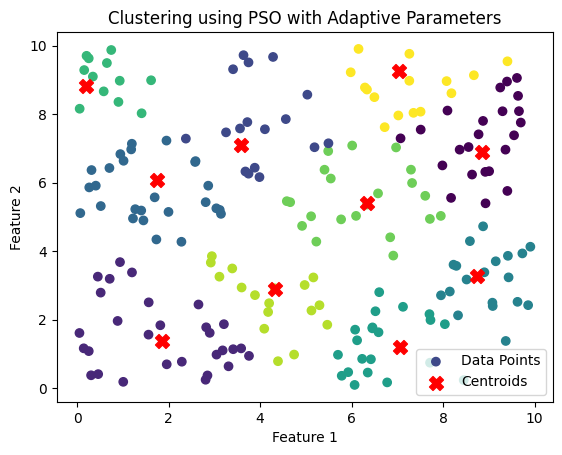

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode

# Parameters for PSO with adjustable attributes
class PSOParameters:
    def __init__(self, particles=100, iterations=500, w_initial=1.0, w_final=0.3, c1=1.3, c2=2.1, K=10):
        self.particles = particles       # Number of particles
        self.iterations = iterations     # Number of iterations
        self.w_initial = w_initial       # Initial inertia weight
        self.w_final = w_final           # Final inertia weight
        self.c1 = c1                     # Cognitive coefficient (pbest)
        self.c2 = c2                     # Social coefficient (gbest)
        self.K = K                       # Number of clusters

class PSOClustering:
    def __init__(self, data, params):
        """
        Initialize PSO clustering instance.
        
        Args:
        data (np.array): Array of data points to cluster.
        params (PSOParameters): PSO parameters for clustering.
        """
        self.data = data
        self.params = params
        self.num_features = data.shape[1]
        
        # Initialize particles' positions and velocities
        self.positions = np.random.rand(params.particles, params.K, self.num_features) * 10
        self.velocities = np.random.rand(params.particles, params.K, self.num_features) * 0.1
        self.pbest_positions = np.copy(self.positions)
        self.pbest_scores = np.full(params.particles, np.inf)
        
        # Initialize global best
        self.gbest_position = None
        self.gbest_score = np.inf

    def _calculate_fitness(self, centroids):
        """
        Calculate fitness as sum of squared distances (SSE) from points to closest centroids.
        Adds a penalty if clusters are imbalanced.
        """
        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        sse = 0
        for point, cluster in zip(self.data, clusters):
            sse += np.sum((point - centroids[cluster]) ** 2)
        
        # Penalti untuk distribusi cluster yang tidak seimbang
        unique, counts = np.unique(clusters, return_counts=True)
        if np.min(counts) < len(self.data) / (2 * self.params.K):
            sse *= 1.5  # Penalti jika ada cluster dengan sangat sedikit anggota

        return sse

    def run(self):
        """
        Run PSO algorithm for clustering and update the global best centroids.
        """
        for iteration in range(self.params.iterations):
            # Update inertia weight secara adaptif
            w = self.params.w_initial - ((self.params.w_initial - self.params.w_final) * (iteration / self.params.iterations))
            
            for i in range(self.params.particles):
                fitness_value = self._calculate_fitness(self.positions[i])
                
                # Update personal best if current fitness is better
                if fitness_value < self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness_value
                    self.pbest_positions[i] = self.positions[i]

                # Update global best if current fitness is the best found so far
                if fitness_value < self.gbest_score:
                    self.gbest_score = fitness_value
                    self.gbest_position = self.positions[i]
            
            # Update velocity and position of each particle
            for i in range(self.params.particles):
                r1, r2 = np.random.rand(), np.random.rand()
                self.velocities[i] = (w * self.velocities[i] +
                                      self.params.c1 * r1 * (self.pbest_positions[i] - self.positions[i]) +
                                      self.params.c2 * r2 * (self.gbest_position - self.positions[i]))
                self.positions[i] += self.velocities[i]

        print("Optimization completed.")
        return self.gbest_position, self.gbest_score

    def evaluate_clustering(self, centroids):
        """
        Evaluate clustering quality with Silhouette Score and Davies-Bouldin Score.
        """
        # Assign each point to the nearest centroid
        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        silhouette_avg = silhouette_score(self.data, clusters)
        davies_bouldin = davies_bouldin_score(self.data, clusters)
        
        print("Silhouette Score:", silhouette_avg)
        print("Davies-Bouldin Score:", davies_bouldin)
        return silhouette_avg, davies_bouldin

    def evaluate_classification_metrics(self, centroids, true_labels):
        """
        Evaluate MAE, accuracy, precision, recall, and F1 score for the clustering results.
        
        Args:
        centroids (np.array): Centroids found by PSO.
        true_labels (np.array): Ground truth labels for each data point.
        
        Returns:
        dict: Dictionary with calculated metrics.
        """
        predicted_clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        mapped_labels = np.zeros_like(predicted_clusters)
        for cluster in np.unique(predicted_clusters):
            mask = predicted_clusters == cluster
            cluster_labels = true_labels[mask]
            if len(cluster_labels) > 0:
                cluster_mode = mode(cluster_labels, keepdims=True).mode[0]
                mapped_labels[mask] = cluster_mode

        metrics = {
            "MAE": mean_absolute_error(true_labels, mapped_labels),
            "Accuracy": accuracy_score(true_labels, mapped_labels),
            "Precision": precision_score(true_labels, mapped_labels, average='macro'),
            "Recall": recall_score(true_labels, mapped_labels, average='macro'),
            "F1 Score": f1_score(true_labels, mapped_labels, average='macro')
        }
        
        print("\nClassification Metrics:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
        
        return metrics

    def plot_clusters(self, centroids):
        """
        Plot the data points and resulting centroids from PSO clustering.
        """
        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        plt.scatter(self.data[:, 0], self.data[:, 1], c=clusters, cmap='viridis', label="Data Points")
        plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100, label="Centroids")
        plt.title("Clustering using PSO with Adaptive Parameters")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()

# Usage example
if __name__ == "__main__":
    # Generate synthetic data or load your dataset
    np.random.seed(42)
    data = np.random.rand(200, 2) * 10  # Example: 200 points in 2D space
    true_labels = np.random.randint(0, 3, size=200)  # Example ground truth labels for 3 clusters

    # Initialize PSO parameters and clustering instance
    pso_params = PSOParameters(K=10)
    pso_clustering = PSOClustering(data, pso_params)

    # Run PSO and get optimal centroids
    centroids, score = pso_clustering.run()
    print("Optimal centroids found by PSO:\n", centroids)
    print("Best SSE score:", score)

    # Evaluate and visualize clustering results
    pso_clustering.evaluate_clustering(centroids)
    pso_clustering.evaluate_classification_metrics(centroids, true_labels)
    pso_clustering.plot_clusters(centroids)


Optimization completed.
Optimal centroids: 
[[4.34001559 1.81313894]
 [1.86230885 6.67151597]
 [7.88963142 6.32557668]]
Best SSE score: 1220.9217734071494
Silhouette Score: 0.4165925270194403, Davies-Bouldin Score: 0.7946394821943109
MAE: 0.8750
Accuracy: 0.4200
Precision: 0.1400
Recall: 0.3333
F1 Score: 0.1972


c:\Users\JuhenFW\VSCODE\myenv2\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


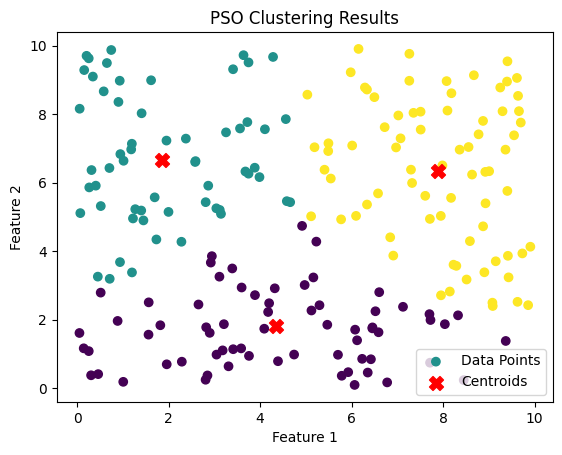

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode
from sklearn.cluster import KMeans

# --- Configuration Section ---
class Config:
    PARTICLES = 50
    ITERATIONS = 200
    W_INITIAL = 1.0
    W_FINAL = 0.3
    C1 = 1.3
    C2 = 2.1
    CLUSTERS = 3
    DATA_POINTS = 200

# --- PSO Parameters Class ---
class PSOParameters:
    def __init__(self, particles=Config.PARTICLES, iterations=Config.ITERATIONS, w_initial=Config.W_INITIAL, w_final=Config.W_FINAL, c1=Config.C1, c2=Config.C2, K=Config.CLUSTERS):
        self.particles = particles
        self.iterations = iterations
        self.w_initial = w_initial
        self.w_final = w_final
        self.c1 = c1
        self.c2 = c2
        self.K = K

# --- Data Loading Function ---
def load_data():
    np.random.seed(42)
    data = np.random.rand(Config.DATA_POINTS, 2) * 10  # Example: random data in 2D
    labels = np.random.randint(0, Config.CLUSTERS, size=Config.DATA_POINTS)
    return data, labels

# --- PSO Clustering Implementation ---
class PSOClustering:
    def __init__(self, data, params):
        self.data = data
        self.params = params
        self.num_features = data.shape[1]
        self.positions = np.random.rand(params.particles, params.K, self.num_features) * 10
        self.velocities = np.random.rand(params.particles, params.K, self.num_features) * 0.1
        self.pbest_positions = np.copy(self.positions)
        self.pbest_scores = np.full(params.particles, np.inf)
        self.gbest_position = None
        self.gbest_score = np.inf

    def _calculate_fitness(self, centroids):
        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        sse = np.sum(np.linalg.norm(self.data - centroids[clusters], axis=1) ** 2)
        return sse

    def run(self):
        for iteration in range(self.params.iterations):
            w = self.params.w_initial - ((self.params.w_initial - self.params.w_final) * (iteration / self.params.iterations))
            for i in range(self.params.particles):
                fitness_value = self._calculate_fitness(self.positions[i])
                if fitness_value < self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness_value
                    self.pbest_positions[i] = self.positions[i]
                if fitness_value < self.gbest_score:
                    self.gbest_score = fitness_value
                    self.gbest_position = self.positions[i]
            for i in range(self.params.particles):
                r1, r2 = np.random.rand(), np.random.rand()
                self.velocities[i] = (w * self.velocities[i] +
                                      self.params.c1 * r1 * (self.pbest_positions[i] - self.positions[i]) +
                                      self.params.c2 * r2 * (self.gbest_position - self.positions[i]))
                self.positions[i] += self.velocities[i]

        print("Optimization completed.")
        return self.gbest_position, self.gbest_score

# --- Evaluation and Validation ---
def evaluate_clustering(data, centroids):
    clusters = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
    silhouette_avg = silhouette_score(data, clusters)
    davies_bouldin = davies_bouldin_score(data, clusters)
    print(f"Silhouette Score: {silhouette_avg}, Davies-Bouldin Score: {davies_bouldin}")
    return silhouette_avg, davies_bouldin

def evaluate_classification_metrics(data, centroids, true_labels):
    clusters = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
    mapped_labels = np.zeros_like(clusters)
    for cluster in np.unique(clusters):
        mask = clusters == cluster
        mapped_labels[mask] = mode(true_labels[mask], keepdims=True).mode[0]
    metrics = {
        "MAE": mean_absolute_error(true_labels, mapped_labels),
        "Accuracy": accuracy_score(true_labels, mapped_labels),
        "Precision": precision_score(true_labels, mapped_labels, average='macro'),
        "Recall": recall_score(true_labels, mapped_labels, average='macro'),
        "F1 Score": f1_score(true_labels, mapped_labels, average='macro')
    }
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    return metrics

def plot_clusters(data, centroids):
    clusters = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', label="Data Points")
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100, label="Centroids")
    plt.title("PSO Clustering Results")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    data, true_labels = load_data()
    pso_params = PSOParameters()
    pso_clustering = PSOClustering(data, pso_params)
    centroids, score = pso_clustering.run()
    print(f"Optimal centroids: \n{centroids}")
    print(f"Best SSE score: {score}")
    
    evaluate_clustering(data, centroids)
    evaluate_classification_metrics(data, centroids, true_labels)
    plot_clusters(data, centroids)


In [7]:
# import cupy as cp
# import time

# # Array besar untuk memverifikasi
# x = cp.random.rand(10000, 10000)

# # Mulai waktu
# start = time.time()
# x = x * x  # Operasi di GPU
# cp.cuda.Stream.null.synchronize()  # Sinkronisasi untuk akurasi waktu
# end = time.time()

# print("Waktu yang dihabiskan di GPU:", end - start, "detik")


Optimization completed.
Optimal centroids: 
[[6.31789771 2.86718001 4.97881476 1.7169689 ]
 [6.08648255 3.71061211 7.4327477  9.98582264]
 [5.02137346 3.31185661 1.5073398  0.29489393]]
Best SSE score: 152.83604659084114
Silhouette Score: 0.6810461692117462, Davies-Bouldin Score: 0.40429283717304343
MAE: 0.3333
Accuracy: 0.6667
Precision: 0.4863
Recall: 0.6667
F1 Score: 0.5504


c:\Users\JuhenFW\VSCODE\myenv2\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


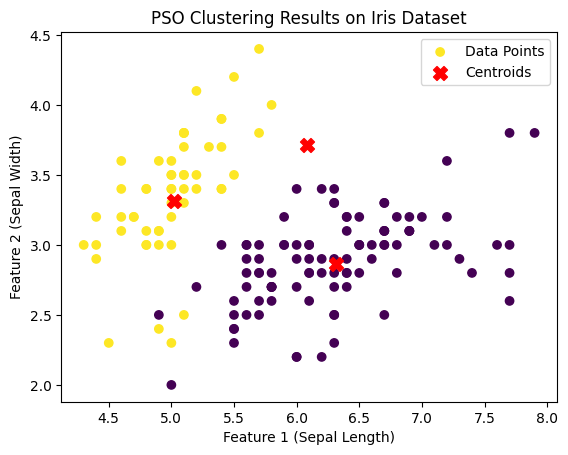

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
from scipy.stats import mode

# --- Configuration Section ---
class Config:
    PARTICLES = 50
    ITERATIONS = 200
    W_INITIAL = 1.0
    W_FINAL = 0.3
    C1 = 1.3
    C2 = 2.1
    CLUSTERS = 3  # Iris dataset has 3 clusters
    DATA_POINTS = 150  # Iris dataset has 150 data points

# --- PSO Parameters Class ---
class PSOParameters:
    def __init__(self, particles=Config.PARTICLES, iterations=Config.ITERATIONS, w_initial=Config.W_INITIAL, w_final=Config.W_FINAL, c1=Config.C1, c2=Config.C2, K=Config.CLUSTERS):
        self.particles = particles
        self.iterations = iterations
        self.w_initial = w_initial
        self.w_final = w_final
        self.c1 = c1
        self.c2 = c2
        self.K = K

# --- Data Loading Function for Iris Dataset ---
def load_data():
    iris = load_iris()
    data = iris.data  # 150 samples with 4 features
    labels = iris.target  # True labels for evaluation
    return data, labels

# --- PSO Clustering Implementation ---
class PSOClustering:
    def __init__(self, data, params):
        self.data = data
        self.params = params
        self.num_features = data.shape[1]
        self.positions = np.random.rand(params.particles, params.K, self.num_features) * 10
        self.velocities = np.random.rand(params.particles, params.K, self.num_features) * 0.1
        self.pbest_positions = np.copy(self.positions)
        self.pbest_scores = np.full(params.particles, np.inf)
        self.gbest_position = None
        self.gbest_score = np.inf

    def _calculate_fitness(self, centroids):
        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        sse = np.sum(np.linalg.norm(self.data - centroids[clusters], axis=1) ** 2)
        return sse

    def run(self):
        for iteration in range(self.params.iterations):
            w = self.params.w_initial - ((self.params.w_initial - self.params.w_final) * (iteration / self.params.iterations))
            for i in range(self.params.particles):
                fitness_value = self._calculate_fitness(self.positions[i])
                if fitness_value < self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness_value
                    self.pbest_positions[i] = self.positions[i]
                if fitness_value < self.gbest_score:
                    self.gbest_score = fitness_value
                    self.gbest_position = self.positions[i]
            for i in range(self.params.particles):
                r1, r2 = np.random.rand(), np.random.rand()
                self.velocities[i] = (w * self.velocities[i] +
                                      self.params.c1 * r1 * (self.pbest_positions[i] - self.positions[i]) +
                                      self.params.c2 * r2 * (self.gbest_position - self.positions[i]))
                self.positions[i] += self.velocities[i]

        print("Optimization completed.")
        return self.gbest_position, self.gbest_score

# --- Evaluation and Validation ---
def evaluate_clustering(data, centroids):
    clusters = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
    silhouette_avg = silhouette_score(data, clusters)
    davies_bouldin = davies_bouldin_score(data, clusters)
    print(f"Silhouette Score: {silhouette_avg}, Davies-Bouldin Score: {davies_bouldin}")
    return silhouette_avg, davies_bouldin

def evaluate_classification_metrics(data, centroids, true_labels):
    clusters = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
    mapped_labels = np.zeros_like(clusters)
    for cluster in np.unique(clusters):
        mask = clusters == cluster
        mapped_labels[mask] = mode(true_labels[mask], keepdims=True).mode[0]
    metrics = {
        "MAE": mean_absolute_error(true_labels, mapped_labels),
        "Accuracy": accuracy_score(true_labels, mapped_labels),
        "Precision": precision_score(true_labels, mapped_labels, average='macro'),
        "Recall": recall_score(true_labels, mapped_labels, average='macro'),
        "F1 Score": f1_score(true_labels, mapped_labels, average='macro')
    }
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    return metrics

def plot_clusters(data, centroids):
    clusters = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', label="Data Points")  # Only plotting the first 2 features
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100, label="Centroids")
    plt.title("PSO Clustering Results on Iris Dataset")
    plt.xlabel("Feature 1 (Sepal Length)")
    plt.ylabel("Feature 2 (Sepal Width)")
    plt.legend()
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    data, true_labels = load_data()
    pso_params = PSOParameters()
    pso_clustering = PSOClustering(data, pso_params)
    centroids, score = pso_clustering.run()
    print(f"Optimal centroids: \n{centroids}")
    print(f"Best SSE score: {score}")
    
    evaluate_clustering(data, centroids)
    evaluate_classification_metrics(data, centroids, true_labels)
    plot_clusters(data, centroids)


# FIX Code Clustering using PSO

Optimization completed.
Optimal centroids: 
[[6.12139999 2.8646113  4.52091465 1.142106  ]
 [5.22540545 3.25641815 1.28587255 0.60519042]
 [6.79021014 3.15363005 5.85443845 1.97225116]]
Best SSE score: 101.81062019304957
Silhouette Score: 0.5518177421032633, Davies-Bouldin Score: 0.6645635038257798
MAE: 0.0933
Accuracy: 0.9067
Precision: 0.9213
Recall: 0.9067
F1 Score: 0.9053


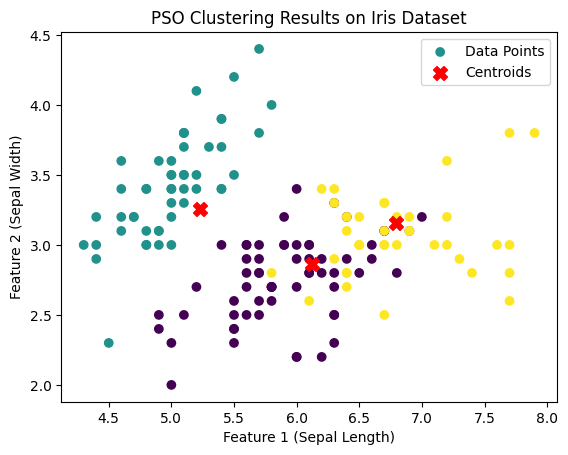

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
from scipy.stats import mode

# --- Configuration Section ---
class Config:
    PARTICLES = 50
    ITERATIONS = 200
    W_INITIAL = 1.0
    W_FINAL = 0.3
    C1 = 1.3
    C2 = 2.1
    CLUSTERS = 3  # Iris dataset has 3 clusters
    DATA_POINTS = 150  # Iris dataset has 150 data points

# --- PSO Parameters Class ---
class PSOParameters:
    def __init__(self, particles=Config.PARTICLES, iterations=Config.ITERATIONS, w_initial=Config.W_INITIAL, w_final=Config.W_FINAL, c1=Config.C1, c2=Config.C2, K=Config.CLUSTERS):
        self.particles = particles
        self.iterations = iterations
        self.w_initial = w_initial
        self.w_final = w_final
        self.c1 = c1
        self.c2 = c2
        self.K = K

# --- Data Loading Function for Iris Dataset ---
def load_data():
    iris = load_iris()
    data = iris.data  # 150 samples with 4 features
    labels = iris.target  # True labels for evaluation
    return data, labels

# --- PSO Clustering Implementation ---
class PSOClustering:
    def __init__(self, data, params):
        self.data = data
        self.params = params
        self.num_features = data.shape[1]
        # Ensure centroids are initialized within the data range to prevent premature convergence
        data_min = np.min(data, axis=0)
        data_max = np.max(data, axis=0)
        self.positions = data_min + np.random.rand(params.particles, params.K, self.num_features) * (data_max - data_min)
        self.velocities = np.random.rand(params.particles, params.K, self.num_features) * 0.1
        self.pbest_positions = np.copy(self.positions)
        self.pbest_scores = np.full(params.particles, np.inf)
        self.gbest_position = None
        self.gbest_score = np.inf

    def _calculate_fitness(self, centroids):
        clusters = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - centroids, axis=2), axis=1)
        sse = np.sum(np.linalg.norm(self.data - centroids[clusters], axis=1) ** 2)
        return sse

    def run(self):
        for iteration in range(self.params.iterations):
            w = self.params.w_initial - ((self.params.w_initial - self.params.w_final) * (iteration / self.params.iterations))
            for i in range(self.params.particles):
                fitness_value = self._calculate_fitness(self.positions[i])
                if fitness_value < self.pbest_scores[i]:
                    self.pbest_scores[i] = fitness_value
                    self.pbest_positions[i] = self.positions[i]
                if fitness_value < self.gbest_score:
                    self.gbest_score = fitness_value
                    self.gbest_position = self.positions[i]
            for i in range(self.params.particles):
                r1, r2 = np.random.rand(), np.random.rand()
                self.velocities[i] = (w * self.velocities[i] +
                                      self.params.c1 * r1 * (self.pbest_positions[i] - self.positions[i]) +
                                      self.params.c2 * r2 * (self.gbest_position - self.positions[i]))
                self.positions[i] += self.velocities[i]

        print("Optimization completed.")
        return self.gbest_position, self.gbest_score

# --- Evaluation and Validation ---
def evaluate_clustering(data, centroids):
    clusters = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
    # Check if there are at least 2 unique clusters before calculating Silhouette Score
    if len(np.unique(clusters)) > 1:
        silhouette_avg = silhouette_score(data, clusters)
        davies_bouldin = davies_bouldin_score(data, clusters)
        print(f"Silhouette Score: {silhouette_avg}, Davies-Bouldin Score: {davies_bouldin}")
        return silhouette_avg, davies_bouldin
    else:
        print("Silhouette Score cannot be calculated: Only one cluster found.")
        return None, None  # or return appropriate values

def evaluate_classification_metrics(data, centroids, true_labels):
    clusters = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
    mapped_labels = np.zeros_like(clusters)
    for cluster in np.unique(clusters):
        mask = clusters == cluster
        mapped_labels[mask] = mode(true_labels[mask], keepdims=True).mode[0]
    metrics = {
        "MAE": mean_absolute_error(true_labels, mapped_labels),
        "Accuracy": accuracy_score(true_labels, mapped_labels),
        "Precision": precision_score(true_labels, mapped_labels, average='macro'),
        "Recall": recall_score(true_labels, mapped_labels, average='macro'),
        "F1 Score": f1_score(true_labels, mapped_labels, average='macro')
    }
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    return metrics

def plot_clusters(data, centroids):
    clusters = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', label="Data Points")  # Only plotting the first 2 features
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=100, label="Centroids")
    plt.title("PSO Clustering Results on Iris Dataset")
    plt.xlabel("Feature 1 (Sepal Length)")
    plt.ylabel("Feature 2 (Sepal Width)")
    plt.legend()
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    data, true_labels = load_data()
    pso_params = PSOParameters()
    pso_clustering = PSOClustering(data, pso_params)
    centroids, score = pso_clustering.run()
    print(f"Optimal centroids: \n{centroids}")
    print(f"Best SSE score: {score}")
   
    evaluate_clustering(data, centroids)
    evaluate_classification_metrics(data, centroids, true_labels)
    plot_clusters(data, centroids)
